## Faster GPUs

With Colab Pro you have priority access to our fastest GPUs and with Pro+ even more so. For example, you may get a T4 or P100 GPU at times when most users of standard Colab receive a slower K80 GPU. You can see what GPU you've been assigned at any time by executing the following cell.

If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to Runtime > Change runtime type in the menu to enable a GPU accelerator, and then re-execute the code cell.

In [23]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jun 14 16:53:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## More memory

With Colab Pro you have the option to access high-memory VMs when they are available, and with Pro+ even more so. To set your notebook preference to use a high-memory runtime, select the Runtime > 'Change runtime type' menu, and then select High-RAM in the Runtime shape dropdown.

You can see how much memory you have available at any time by running the following code cell.



If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via Runtime > Change runtime type in the menu. Then select High-RAM in the Runtime shape dropdown. After, re-execute the code cell.


In [24]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# I ran this code in google colab, so I have to install cartopy first
! pip install cartopy
! pip uninstall shapely
! pip install shapely --no-binary shapely

In [26]:
# import packages we need
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [ ]:
# -- Read data from google drive
from google.colab import drive
drive.mount('/content/gdrive')
% cd '/content/gdrive/MyDrive/EMDO_Intern/'
! ls
data_dir = '/content/gdrive/MyDrive/EMDO_Intern/'

In [ ]:
# -- Read data
data = scipy.io.loadmat(data_dir + 'maiac_era5_sur_train_data_daily_AOD_filled.mat')
# note: This dataset include daily NO2 observation of 1650 sites from 2016 to 2020

In [27]:
# Obtain the data we need
keys = data.keys()
print(keys)
df_data = pd.DataFrame()
df_data['latitude'] = np.squeeze(data['mege_plat'])
df_data['longitude'] = np.squeeze(data['mege_plon'])
df_data['concentration'] = np.squeeze(data['mege_no2'])
df_data['SID'] = np.squeeze(data['mege_sid'])

# Calculate the mean value of NO2 observation of each site from 2016 to 2020
df_data_mean = df_data.groupby('SID').mean()
print(df_data_mean.head())

dict_keys(['__header__', '__version__', '__globals__', 'mege_date', 'mege_sid', 'mege_plon', 'mege_plat', 'mege_pm25', 'mege_pm10', 'mege_no2', 'mege_so2', 'mege_o3', 'mege_co', 'mege_aod', 'mege_t2m', 'mege_sp', 'mege_rh', 'mege_u10', 'mege_v10', 'mege_tcw', 'mege_to3', 'mege_tp', 'mege_pblh', 'mege_Div', 'mege_DEM', 'mege_LC', 'mege_pop', 'mege_Pt', 'mege_Ps1', 'mege_Ps2', 'mege_Ps3', 'mege_Ps4', 'mege_Ps5', 'mege_mdis'])
       latitude   longitude  concentration
SID                                       
1001  39.866522  116.366718      42.620392
1002  40.286053  116.167938      21.775075
1003  39.955428  116.435981      41.478744
1004  39.876017  116.436069      41.422103
1005  39.975806  116.476234      44.003886


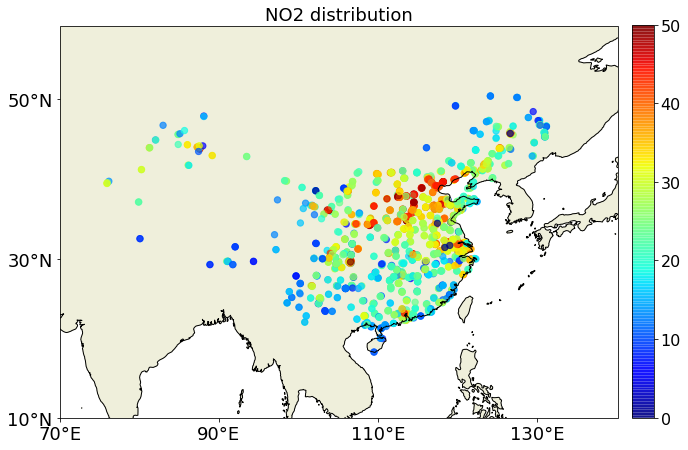

In [28]:
# basemap

fig = plt.figure(figsize = (10, 12))

dlon, dlat = 20, 20
xticks = np.arange(70, 140, dlon)
yticks = np.arange(10,54.1, dlat)


ax0 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax0.set_extent([70,140.1,10,54.1])
ax0.set_title('NO2 distribution',fontsize=18)

ax0.coastlines() 
ax0.add_feature(cfeature.LAND) # add land feature
ax0.set_xticks(xticks, crs=ccrs.PlateCarree()) 
ax0.set_xticklabels(xticks,fontsize=18)
ax0.set_yticks(yticks, crs=ccrs.PlateCarree()) 
ax0.set_yticklabels(yticks,fontsize=18)
ax0.xaxis.set_major_formatter(LongitudeFormatter())
ax0.yaxis.set_major_formatter(LatitudeFormatter())

fig.subplots_adjust(right = 0.9)
c = ax0.scatter(df_data_mean['longitude'], df_data_mean['latitude'], s=40, c = df_data_mean['concentration'],\
                  alpha=0.7,vmin = 0, vmax = 50, cmap = 'jet')



cbar_ax = plt.axes([0.92, 0.276, 0.03, 0.455])
bar = plt.colorbar(c, cax=cbar_ax, orientation='vertical')

levs = np.arange(0, 51 ,10)    #colobar range
bar.ax.tick_params(labelsize = 16)
bar.set_ticks(levs)

plt.savefig('./NO2_distribution.png')